Titanic: Machine Learning from Disaster

In this step i will import packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

upload train.csv and test.csv files.

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Checked info of the train.csv file in order to see types of files we are working with.

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- There are missing 177 numeirc values for the Age
- 687 entries for the Cabin
- 2 entries for Embarked.

In [44]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We need to use numbers for machine learning so we will remove all the excess data, and try to figure out all the remining NaN values.

In [45]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead], index=['Survived','Dead'])
    df.plot(kind='bar', stacked=True, figsize=(6,3))

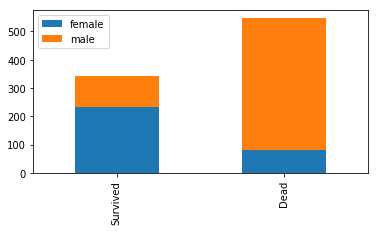

In [47]:
bar_chart('Sex')

We see that there are more women who surived the titanic.

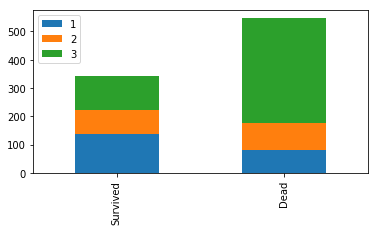

In [48]:
bar_chart('Pclass')

We see that there are more survivors in the first class compared to other classes.

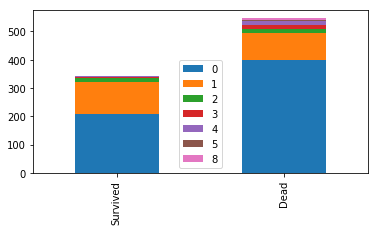

In [49]:
bar_chart('SibSp')

Doesn't seems like there is a significant correlation between the number of sibibling and survivla rate.

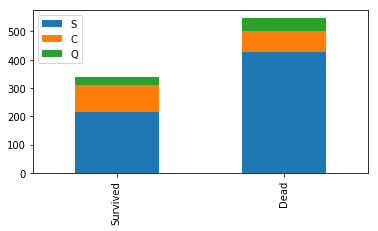

In [50]:
bar_chart('Embarked')

Seems that people who embarked in S are more likely to survive.

Let's remove the unnecesasary data.

In [51]:
train.drop('Name', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)
train.drop('Fare', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)

test.drop('Name', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
test.drop('Fare', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [53]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


Let's convert features to numeric values, and clean up some NaNs.

- Convert the 'Sex' column to the numerical values:
male=1
female=0

In [54]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

- Convert the 'Embarked' column into the numerical values:
S=1
C=2
Q=3

In [55]:
train['Embarked'] = train['Embarked'].map({'S': 1, 'C': 2, 'Q':3})
test['Embarked'] = test['Embarked'].map({'S': 1, 'C': 2, 'Q':3})

Let's find the possible values for the NaNs in the 'Age' column. 

- For that I'm going to group passangers by their Pclass, and use the median age in order to fill some gaps.

In [56]:
train['Age'].fillna(train.groupby('Pclass')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,1.0
1,2,1,1,0,38.0,1,0,2.0
2,3,1,3,0,26.0,0,0,1.0
3,4,1,1,0,35.0,1,0,1.0
4,5,0,3,1,35.0,0,0,1.0


In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,3
1,893,3,0,47.0,1,0,1
2,894,2,1,62.0,0,0,3
3,895,3,1,27.0,0,0,1
4,896,3,0,22.0,1,1,1


Now that we filled the gaps in Age, let's see if there is a correlation with age.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


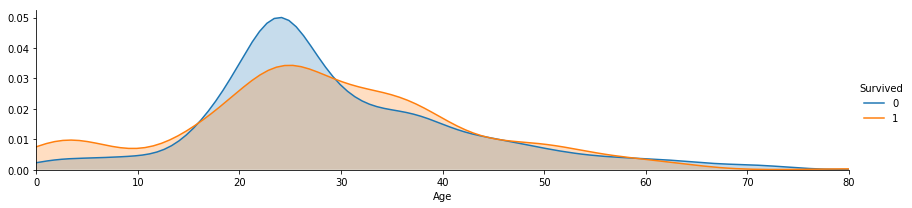

In [59]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [60]:
train.info()
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       889 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null int64
dtypes: float64(1), int64(6)
memory usage: 22.9 KB


Let's drop all the missing rows in Embarked.

In [61]:
train=train.dropna()
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Embarked       889 non-null float64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


Now that all data is numerical, we can proceed with Modelling

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [63]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

Decision tree

In [64]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, error_score=np.nan)
print(score)

[0.65168539 0.76404494 0.79775281 0.70786517 0.75280899 0.75280899
 0.7752809  0.69662921 0.79775281 0.72727273]


kNN

In [65]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.58426966 0.52808989 0.5505618  0.60674157 0.60674157 0.52808989
 0.51685393 0.59550562 0.5505618  0.51136364]


Random Forest

In [66]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.69662921 0.76404494 0.83146067 0.74157303 0.79775281 0.79775281
 0.75280899 0.78651685 0.82022472 0.78409091]


Naive Bayes

In [67]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.65168539 0.7752809  0.83146067 0.78651685 0.85393258 0.7752809
 0.75280899 0.75280899 0.75280899 0.80681818]


SVM

In [68]:
clf = SVC(gamma='auto')
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.5505618  0.59550562 0.59550562 0.66292135 0.66292135 0.59550562
 0.61797753 0.62921348 0.60674157 0.55681818]


Preparing file for the final submission

In [69]:
train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1,22.0,1,0,1.0
1,2,1,0,38.0,1,0,2.0
2,3,3,0,26.0,0,0,1.0
3,4,1,0,35.0,1,0,1.0
4,5,3,1,35.0,0,0,1.0


In [70]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,3
1,893,3,0,47.0,1,0,1
2,894,2,1,62.0,0,0,3
3,895,3,1,27.0,0,0,1
4,896,3,0,22.0,1,1,1


In [71]:
train_data=train_data.drop('PassengerId', axis=1).copy()
clf = SVC(gamma='auto')
clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis=1).copy()
prediction = clf.predict(test_data)

Let's generate the submission.csv file

In [72]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
})

submission.to_csv('submission.csv', index=False)

In [73]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [224]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
